# Data Analysis of Denim Weaving floor Using Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [64]:
df = pd.read_excel("2021 Style wise production.xlsx")
df_copy= df.copy()
df = df.fillna(0)
df

,SL,Syle No,Construction,Ends Dent,Reed Count,Fab Oz,Warp Cmpx,Warp Stop,Weft Cmpx,Weft Stop,Other Stop,TotalProd,Rated RPM,Actual RPM,Pick,Run Time,M\C Effi,M\C Effi Pick Base
0,1,1002R1A,9oe X 10oe /66X37,0,0,10.0,2.70,10.0,2.70,10.0,2.0,195,900,850,365500,7.43,93,104
1,2,1003RSC-2,10OE X 16L-40D/71X48,4,698,10.0,1.33,1626.0,1.23,1514.0,996.0,71036,900,904,122705298,2268.33,92,100
2,3,1003XS3D,9Rsl001+10 X 16SlubL-40D+16L-40D,4,652,9.5,1.30,195.0,0.98,149.0,93.0,8723,900,835,15086656,305.13,93,101
3,4,1003YS15D-2,10Rsl001+9oe X 16L-70D/71X48,4,698,10.8,1.42,3967.0,1.47,4059.0,2087.0,162159,887,920,280310483,5085.94,92,100
4,5,1003YS15D-2OR,10Rsl001+9OE(Organic) X 16L-70D/7,4,698,10.8,1.80,738.0,1.79,760.0,295.0,24905,900,892,43043797,806.80,90,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,352,SF9503YSA,9Rsl +10 OE X 16L-40D/ 71X48,4,698,9.5,0.00,0.0,1.90,7.0,2.0,195,750,800,373982,7.78,97,100
352,353,SFP8003Y2B-2,14Rsl001 X 150DPL-70D(Black)/71X6,4,698,8.3,1.41,5.0,0.28,1.0,0.0,206,900,754,355100,7.85,98,100
353,354,SFP8004RD-2,20Rcom X 150DPL-70D(144Fi Wh)/11,5,869,8.8,1.14,1555.0,1.35,1886.0,721.0,60436,899,848,139407008,2742.62,94,100
354,355,SFP8304R2A,30RCom X 150DPL-70D(Black) /110X,5,869,8.2,1.79,577.0,2.07,666.0,223.0,12774,900,773,31647069,683.75,91,100


# Major Styles Contributing In Production 2021

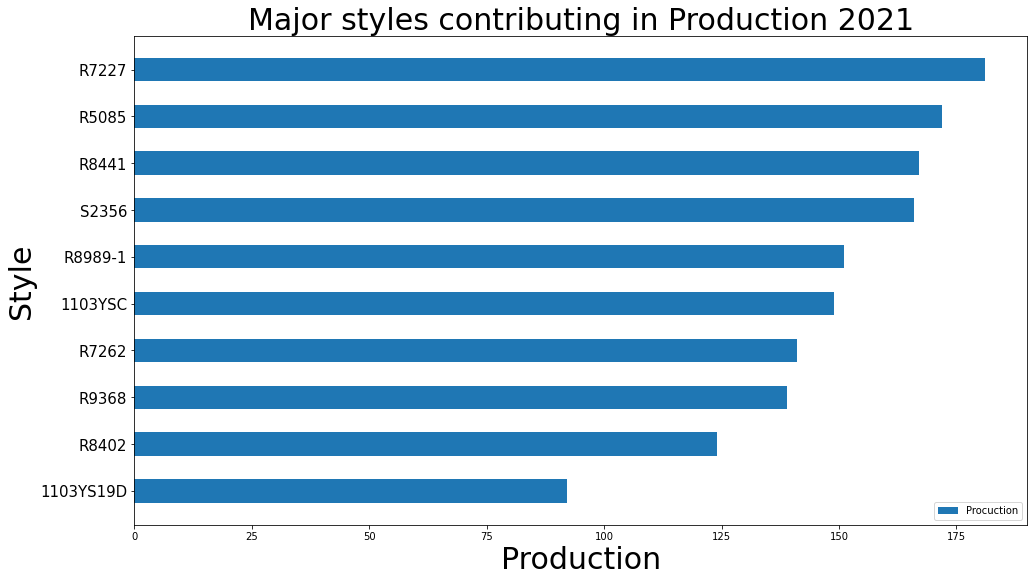

In [50]:
xposition= np.arange(10)
plt.figure(figsize=(16,9))
# plt.barh(xposition-0.2,df_production["Syle No"],height=0.4,label="Style")
plt.barh(xposition,df_production["TotalProd"],height=0.5,label="Procuction")
plt.yticks(xposition,df_production["Syle No"],fontsize = 15)
plt.xticks()
plt.title("Major styles contributing in Production 2021",fontsize= 30)
plt.ylabel("Style",fontsize= 30)
plt.xlabel("Production",fontsize=30)
plt.legend()
plt.show()

# Styles with Highest Rpm

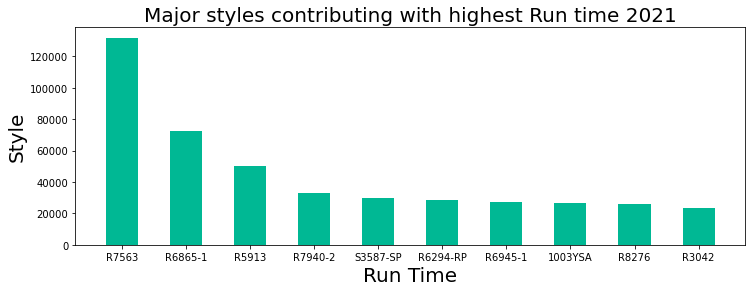

In [51]:
column_list =["Run Time"]
for col in column_list:
    df_production = df[["Syle No",col]]
    df_production = df_production.sort_values(by=col,ascending= False)
    df_production = df_production.head(10)
    plt.figure(figsize=(12,4))
    plt.title("Major styles contributing with highest Run time 2021",fontsize= 20)
    barwidth=0.5
    plt.ylabel("Style",fontsize=20)
    plt.xlabel("Run Time",fontsize=20)
    plt.bar(df_production["Syle No"],df_production[col],width=barwidth,color="#00b894")
    plt.show()


# RPM Analysis

In [6]:
df_rpm =df["Actual RPM"].unique()
df_rpm= pd.Series(df_rpm)
# df_rpm = df_rpm.sort_values(ascending= True)

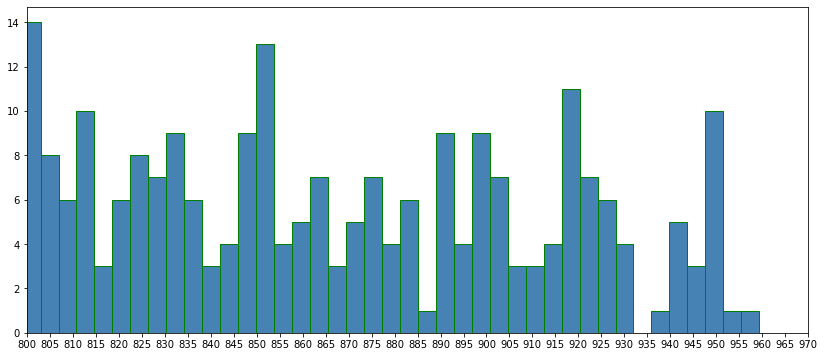

In [7]:
values = df["Actual RPM"]
plt.subplots(figsize=(14,6))
# plt.hist(values,bins=len(df_rpm>850),alpha=0.8,histtype="bar",color= "steelblue",edgecolor="green")
plt.hist(values,bins =100,color= "steelblue",edgecolor="green")
plt.xlim(xmin=800,xmax=950)
plt.xticks(np.arange(800,max(df["Actual RPM"]),5))
plt.show()


# Warp Cmpx Box plot

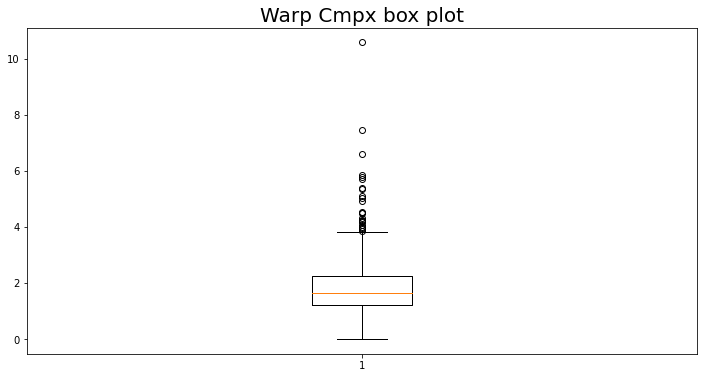

In [58]:
df_warp_cmpx = df["Warp Cmpx"]
plt.figure(figsize=(12,6))
plt.boxplot(df_warp_cmpx)
plt.title("Warp Cmpx box plot",fontsize=20)
plt.show()

# Weft Cmpx Box Plot

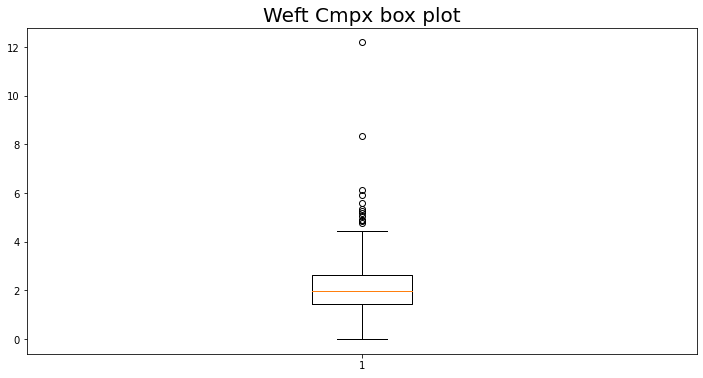

In [19]:
df_weft_cmpx = df["Weft Cmpx"]
plt.figure(figsize=(12,6))
plt.boxplot(df_weft_cmpx)
plt.title("Weft Cmpx box plot",fontsize=20)
plt.show()

# Scatterplot

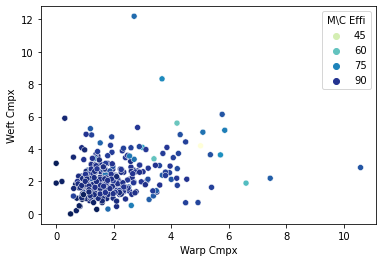

In [60]:
sns.scatterplot(x ="Warp Cmpx",y = "Weft Cmpx",data = df,hue = 'M\C Effi',palette= "YlGnBu" )
plt.show()

# Histogram

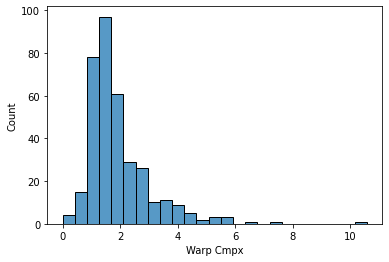

In [61]:
sns.histplot(df["Warp Cmpx"],bins=25)
plt.show()

# Distribution Plot

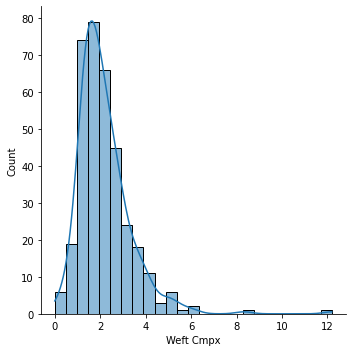

In [62]:
sns.displot(df["Weft Cmpx"],kde=True,bins=25)
plt.show()

# Heatmap (corelation)

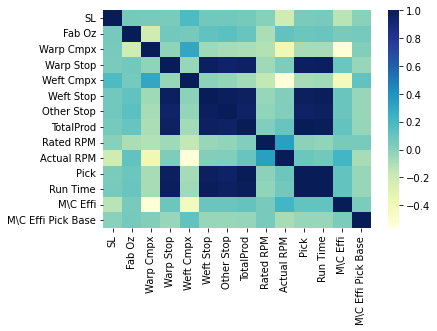

In [63]:
sns.heatmap(df.corr(),cmap="YlGnBu")
plt.show()